# Analysis 1
## Analyzing Pattern of Crime over the years since 2001

In [1]:
#Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
%matplotlib inline

In [2]:
#Read the input file
df=pd.read_csv('../data/raw_data/Crimes_-_2001_to_present.csv')

In [3]:
#Print the input
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5708019,HN516812,08/07/2007 05:00:00 PM,018XX W 103RD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,CONSTRUCTION SITE,False,False,...,19.0,72.0,14,1165922.0,1836379.0,2007,04/15/2016 08:55:02 AM,41.706602,-87.668011,"(41.706601577, -87.668010676)"
1,5708022,HN515380,08/07/2007 09:00:00 PM,066XX S ELLIS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",False,False,...,5.0,42.0,18,1184028.0,1861290.0,2007,04/15/2016 08:55:02 AM,41.774557,-87.600931,"(41.77455706, -87.600931147)"
2,5708025,HN516837,08/03/2007 10:00:00 AM,054XX W WINDSOR AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,45.0,15.0,14,1139275.0,1929741.0,2007,04/15/2016 08:55:02 AM,41.963325,-87.763324,"(41.963324609, -87.763324045)"
3,5708028,HN516787,08/03/2007 04:30:00 PM,001XX N STATE ST,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,False,False,...,42.0,32.0,06,1176336.0,1901448.0,2007,04/15/2016 08:55:02 AM,41.884930,-87.627920,"(41.884930201, -87.627919724)"
4,5708029,HN495945,07/29/2007 10:02:00 AM,078XX S BENNETT AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,VEHICLE NON-COMMERCIAL,True,False,...,8.0,43.0,18,1190231.0,1853330.0,2007,04/15/2016 08:55:02 AM,41.752567,-87.578448,"(41.752566947, -87.578448404)"


In [4]:
#Total Count of all crimes from 2001 to 2017
total_crimes = df.groupby('Primary Type').size()
total_crimes.head()

Primary Type
ARSON                                  10516
ASSAULT                               386125
BATTERY                              1151775
BURGLARY                              368363
CONCEALED CARRY LICENSE VIOLATION        100
dtype: int64

In [5]:
#Converting it into dataframe
framed_total_crimes = total_crimes.to_frame()
framed_total_crimes.head()

,0
Primary Type,
ARSON,10516
ASSAULT,386125
BATTERY,1151775
BURGLARY,368363
CONCEALED CARRY LICENSE VIOLATION,100


In [6]:
#Sort the crimes based on total count and writing it to csv
Sorted_framed_total_crimes = framed_total_crimes.reset_index().rename(columns={0:'Count'}).sort_values('Count', ascending=False)
if not os.path.exists('ana_1'):
    os.makedirs('ana_1')
Sorted_framed_total_crimes.to_csv('ana_1/Count of Crime by Primary Type Classification.csv')
Sorted_framed_total_crimes.head()

,Primary Type,Count
33,THEFT,1313087
2,BATTERY,1151775
6,CRIMINAL DAMAGE,725822
18,NARCOTICS,690342
25,OTHER OFFENSE,391313


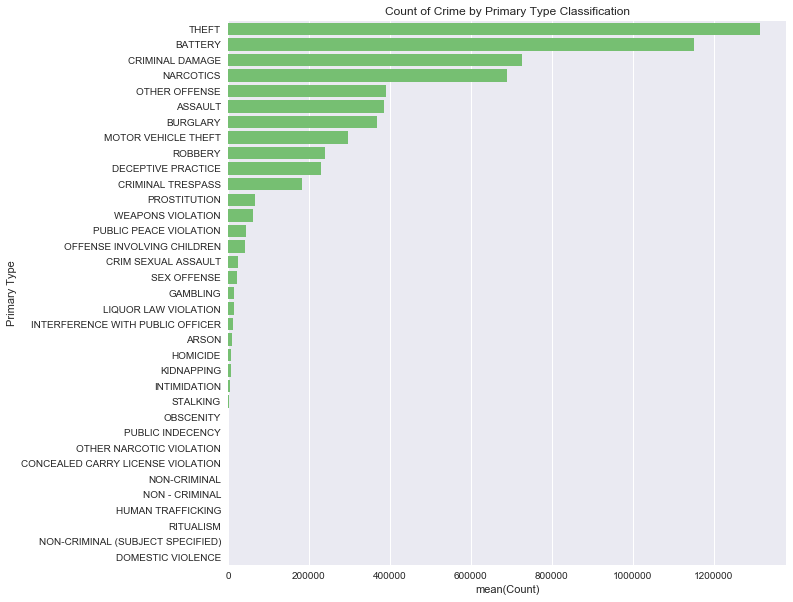

In [7]:
#Lets try to plot this inference to a plot
fig,ax = plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
ax = sns.barplot(x ="Count", y = "Primary Type", data = Sorted_framed_total_crimes,ax = ax, color='g')
ax.set_title("Count of Crime by Primary Type Classification")
ax
if not os.path.exists('ana_1'):
    os.makedirs('ana_1')
plt.savefig('ana_1/Count of Crime by Primary Type Classification')

In [8]:
#Change of Crimes by Year
yearly_count = df.groupby("Year").size().to_frame().reset_index().rename(columns={0:"Count"})        
if not os.path.exists('ana_1'):
    os.makedirs('ana_1')
yearly_count.to_csv('ana_1/Change in Count of Crime by Year.csv')
yearly_count.head()

,Year,Count
0,2001,485725
1,2002,486739
2,2003,475912
3,2004,469354
4,2005,453673


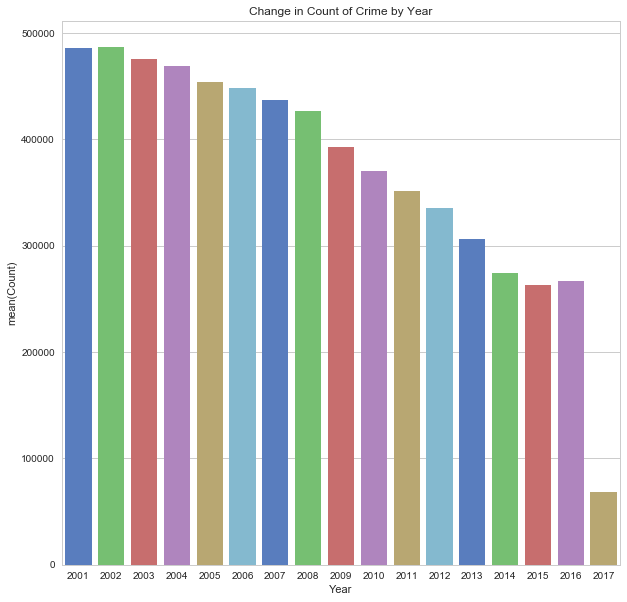

In [9]:
#Plotting it to a graph
fig,ax = plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
ax = sns.barplot(x ="Year", y = "Count", palette="muted", data = yearly_count,ax = ax)
ax.set_title("Change in Count of Crime by Year")
if not os.path.exists('ana_1'):
    os.makedirs('ana_1')
plt.savefig('ana_1/Change in Count of Crime by Year.png')

### Inference:
- We can see that Theft is the most common crime that takes place in Chicago.
- If we observe the second graph, we can analyze that the rate of crime in Chicago is showing decreasing trend over the years since 2001, thus slowly Chicago is becoming a better and safe place to live.
- There is a sudden fall of crime in the year 2017, because of the obvious lack of full year's worth of data.